# Ejercicio 3 – Predicción de Consumo Excesivo de Agua  
### Fase 1: CARGA Y EXPLORACIÓN GENERAL  
por Jessica | Rama: Steph

En esta fase se realiza la carga inicial del dataset y una exploración general de sus características. Esto incluye:

- Visualizar las dimensiones y nombres de las columnas.
- Mostrar las primeras filas del dataset.
- Verificar los tipos de datos.
- Detectar posibles valores nulos o errores.


In [ ]:
import pandas as pd

# Cargamos los datos
df = pd.read_csv("../datasets/consumo_agua.csv")

# revisamos las dimensiones del dataframe
print("Dimensiones del dataframe:")
print(f"Filas: {df.shape[0]}, Columnas: {df.shape[1]}")

# mostramos las primeras 5 filas
print("\nPrimeras filas del dataframe:")
display(df.head())

Dimensiones del dataframe:
Filas: 71102, Columnas: 16

Primeras filas del dataframe:


,fecha_referencia,anio,bimestre,consumo_total_mixto,consumo_prom_dom,consumo_total_dom,consumo_prom_mixto,consumo_total,consumo_prom,consumo_prom_no_dom,consumo_total_no_dom,indice_des,colonia,alcaldia,latitud,longitud
0,2019-06-30,2019,3,159.72,42.566364,468.23,53.24,631.00,42.066667,3.05,3.05,ALTO,7 DE NOVIEMBRE,GUSTAVO A. MADERO,19.455260,-99.112662
1,2019-06-30,2019,3,0.00,35.936667,107.81,0.00,115.13,28.782500,7.32,7.32,MEDIO,7 DE NOVIEMBRE,GUSTAVO A. MADERO,19.455260,-99.112662
2,2019-06-30,2019,3,0.00,24.586000,122.93,0.00,197.96,32.993333,75.03,75.03,POPULAR,7 DE NOVIEMBRE,GUSTAVO A. MADERO,19.455720,-99.113582
3,2019-06-30,2019,3,0.00,0.000000,0.00,0.00,253.53,84.510000,84.51,253.53,BAJO,GERTRUDIS SANCHEZ 3A SECCION,GUSTAVO A. MADERO,19.459647,-99.104469
4,2019-06-30,2019,3,56.72,67.436250,539.49,56.72,839.35,76.304545,121.57,243.14,BAJO,PRO HOGAR I,AZCAPOTZALCO,19.474161,-99.146750


**1.2 Revisión de tipos de datos y valores faltantes**  
Antes de iniciar con transformaciones o limpieza, es necesario conocer los tipos de datos presentes en el conjunto y detectar posibles valores nulos. Esta revisión es crucial para garantizar la correcta manipulación de las variables en etapas posteriores, y para identificar si alguna columna debe tratarse o eliminarse.

En esta etapa:

Inspeccionaremos los tipos de datos por columna.

Calcularemos la cantidad y proporción de valores nulos.

Evaluaremos si hay columnas completamente vacías o irrelevantes.

Observaremos si hay duplicados o inconsistencias básicas.

In [6]:
# Tipos de datos de cada columna
print("Tipos de datos por columna:")
print(df.dtypes)

# Valores nulos por columna
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())

# Proporción de valores nulos (en porcentaje)
print("\nPorcentaje de valores nulos por columna:")
print((df.isnull().sum() / len(df) * 100).round(2))

# Revisar si hay filas duplicadas exactas
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Tipos de datos por columna:
fecha_referencia         object
anio                      int64
bimestre                  int64
consumo_total_mixto     float64
consumo_prom_dom        float64
consumo_total_dom       float64
consumo_prom_mixto      float64
consumo_total           float64
consumo_prom            float64
consumo_prom_no_dom     float64
consumo_total_no_dom    float64
indice_des               object
colonia                  object
alcaldia                 object
latitud                 float64
longitud                float64
dtype: object

Conteo de valores nulos por columna:
fecha_referencia           0
anio                       0
bimestre                   0
consumo_total_mixto     8327
consumo_prom_dom        4820
consumo_total_dom       4820
consumo_prom_mixto      8327
consumo_total              0
consumo_prom               0
consumo_prom_no_dom        0
consumo_total_no_dom       0
indice_des                 0
colonia                  216
alcaldia                 216
la

**1.2 Revisión de tipos de datos y valores faltantes**

COn el análisis detallado de los tipos de datos, valores nulos y duplicados presentes en el conjunto de datos:

- Las columnas están compuestas principalmente por datos numéricos (`float64` y `int64`) y objetos tipo `string` para variables categóricas como `colonia`, `alcaldia` e `indice_des`.
- Se detectaron valores nulos en 6 columnas, siendo significativos en:
  - `consumo_total_mixto` y `consumo_prom_mixto` (~11.7% de nulos).
  - `consumo_prom_dom` y `consumo_total_dom` (~6.8% de nulos).
  - `colonia` y `alcaldia` con ~0.3% de valores nulos.

Además:
- Se identificaron **1,450 filas duplicadas exactas**.
- No se detectaron columnas completamente vacías ni con tipos erróneos en esta etapa.

Estos hallazgos justifican proceder a una **limpieza estructurada de los datos**, donde se abordarán los valores faltantes, se eliminarán duplicados y se ajustarán las columnas necesarias para el análisis.


**2.1 Limpieza de datos faltantes y duplicados**

Con base en el análisis previo, haremos la limpieza del conjunto de datos eliminando las filas duplicadas y aquellas que contengan valores faltantes en columnas clave.

Las decisiones son:

- ELiminaré las **filas duplicadas completas**, ya que no aportan nueva información al modelo.
- Eliminaré las **filas con valores faltantes** en las columnas `consumo_total_mixto`, `consumo_prom_dom`, `consumo_total_dom`, `consumo_prom_mixto`, `colonia` y `alcaldia`, dado que:
  - Representan un porcentaje bajo o moderado del total (<12%).
  - Son columnas relevantes para el análisis posterior.
  - No es conveniente imputar datos faltantes en variables cuantitativas con alta varianza ni en categóricas geográficas como `colonia`.

In [7]:
# Copia de seguridad del dataframe original
df_limpio = df.copy()

# 1. Eliminar filas duplicadas
duplicados = df_limpio.duplicated().sum()
print(f"Número de filas duplicadas eliminadas: {duplicados}")
df_limpio = df_limpio.drop_duplicates()

# 2. Eliminar filas con valores nulos en columnas clave
columnas_con_nulos = ['consumo_total_mixto', 'consumo_prom_dom', 'consumo_total_dom', 
                      'consumo_prom_mixto', 'colonia', 'alcaldia']
nulos_antes = df_limpio[columnas_con_nulos].isnull().sum().sum()
print(f"Número total de valores nulos eliminados en columnas clave: {nulos_antes}")
df_limpio = df_limpio.dropna(subset=columnas_con_nulos)

# 3. Mostrar nuevas dimensiones del dataframe limpio
print(f"Dimensiones del dataframe después de limpieza: {df_limpio.shape}")

Número de filas duplicadas eliminadas: 1450
Número total de valores nulos eliminados en columnas clave: 26726
Dimensiones del dataframe después de limpieza: (60585, 16)


Para garantizar la calidad del análisis, realizamos el proceso pasado de limpieza de datos enfocado en:

* La **eliminación de duplicados**, ya que pueden sesgar los resultados o inflar patrones espurios.
* El **manejo de valores nulos** en columnas clave para el análisis de consumo de agua y ubicación.

**Acciones realizadas:**

* Se eliminaron **1,450 filas duplicadas** del conjunto original.
* Se eliminaron **26,726 filas con valores faltantes** en columnas consideradas críticas para el análisis, incluyendo:

  * `consumo_total_mixto`
  * `consumo_prom_dom`
  * `consumo_total_dom`
  * `consumo_prom_mixto`
  * `colonia`
  * `alcaldia`

Estas columnas reflejan tanto el consumo residencial como la localización territorial, por lo que mantener registros completos es esencial para asegurar la validez del análisis posterior.

**Resultado de la limpieza:**

Después de aplicar estos filtros, el conjunto de datos pasó de **71,102 a 60,585 filas**, conservando todas sus columnas originales (16 en total). Este nuevo dataframe limpio (`df_limpio`) lo usaremos en las siguientes etapas del análisis.

**2.2 Conversión de tipos y formateo de variables**  
Con el conjunto de datos ya limpio, el siguiente paso consiste en asegurar que cada variable tenga el tipo de dato correcto. Esto es importante para evitar errores en los procesos de análisis, visualización o modelado posterior.  

Objetivos de esta etapa:  
Convertir la columna fecha_referencia de tipo object a tipo datetime.  

Verificar que las variables numéricas estén correctamente tipificadas (int o float).

Confirmar que las variables categóricas (indice_des, colonia, alcaldia) permanezcan como tipo object para un adecuado manejo posterior (codificación o agrupamiento).

In [8]:
# Conversión de fecha
df_limpio['fecha_referencia'] = pd.to_datetime(df_limpio['fecha_referencia'], errors='coerce')

# Verificación final de tipos
print("Tipos de datos tras conversión:\n")
print(df_limpio.dtypes)

Tipos de datos tras conversión:

fecha_referencia        datetime64[ns]
anio                             int64
bimestre                         int64
consumo_total_mixto            float64
consumo_prom_dom               float64
consumo_total_dom              float64
consumo_prom_mixto             float64
consumo_total                  float64
consumo_prom                   float64
consumo_prom_no_dom            float64
consumo_total_no_dom           float64
indice_des                      object
colonia                         object
alcaldia                        object
latitud                        float64
longitud                       float64
dtype: object


**3.1 – Análisis exploratorio univariado**

Objetivo:
Realizar un análisis estadístico y visual de las distribuciones individuales de las variables numéricas del conjunto de datos. Este paso permite detectar comportamientos anómalos, rangos comunes de valores, sesgos o concentraciones que orienten futuras decisiones de preprocesamiento, modelado o interpretación.

Nos enfocaremos primero en las variables de consumo (total y promedio, por tipo de usuario) ya que son las más representativas del comportamiento hídrico de las colonias.

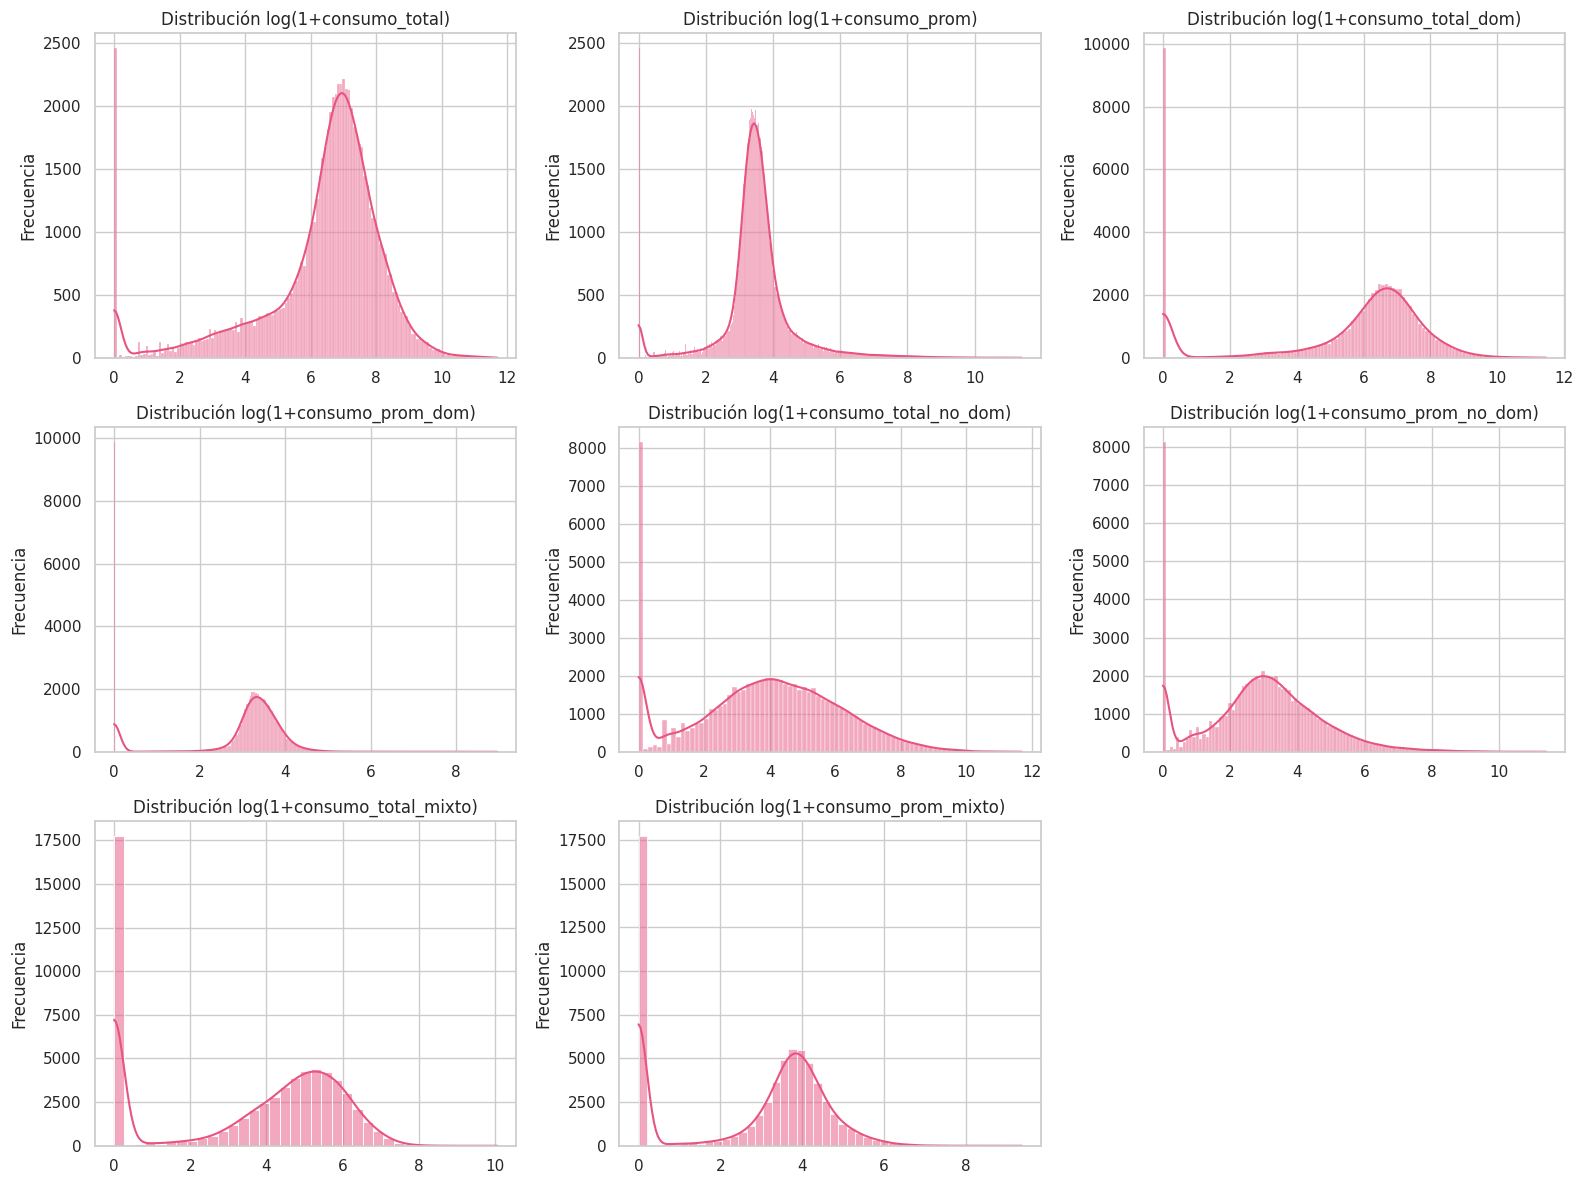

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética en rosa
rosa = "#e75480"
sns.set(style="whitegrid", palette=[rosa])

# Variables de consumo
variables_consumo = [
    'consumo_total', 'consumo_prom',
    'consumo_total_dom', 'consumo_prom_dom',
    'consumo_total_no_dom', 'consumo_prom_no_dom',
    'consumo_total_mixto', 'consumo_prom_mixto'
]

# Gráficas log-transformadas
plt.figure(figsize=(16, 12))
for i, var in enumerate(variables_consumo):
    plt.subplot(3, 3, i + 1)
    sns.histplot(np.log1p(df[var]), kde=True, color=rosa)
    plt.title(f'Distribución log(1+{var})')
    plt.xlabel('')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


**Resumen estadístico y exploración de variables categóricas**

Antes de analizar las distribuciones, revisamos las estadísticas descriptivas y la composición de las variables categóricas más relevantes.

In [20]:
# Resumen estadístico de variables numéricas
print("Resumen estadístico de variables numéricas:")
print(df_limpio.describe())

# Resumen de variables categóricas (si existen)
print("\nResumen de variables categóricas:")
print(df_limpio.describe(include='object'))

# Valores únicos por columna
print("\nValores únicos por columna:")
print(df_limpio.nunique())

Resumen estadístico de variables numéricas:
                    fecha_referencia     anio      bimestre  \
count                          60585  60585.0  60585.000000   
mean   2019-05-08 16:20:43.555335424   2019.0      2.142312   
min              2019-02-28 00:00:00   2019.0      1.000000   
25%              2019-04-30 00:00:00   2019.0      2.000000   
50%              2019-04-30 00:00:00   2019.0      2.000000   
75%              2019-06-30 00:00:00   2019.0      3.000000   
max              2019-06-30 00:00:00   2019.0      3.000000   
std                              NaN      0.0      0.773259   

       consumo_total_mixto  consumo_prom_dom  consumo_total_dom  \
count         60585.000000      60585.000000       60585.000000   
mean            175.400078         28.693178        1134.257240   
min               0.000000          0.000000           0.000000   
25%               0.000000         18.690313         165.930000   
50%              82.360000         26.530448         

**Distribución de registros por alcaldía e índice de desarrollo**

Visualizamos la cantidad de registros por alcaldía y por índice de desarrollo para detectar posibles desbalances o patrones territoriales.

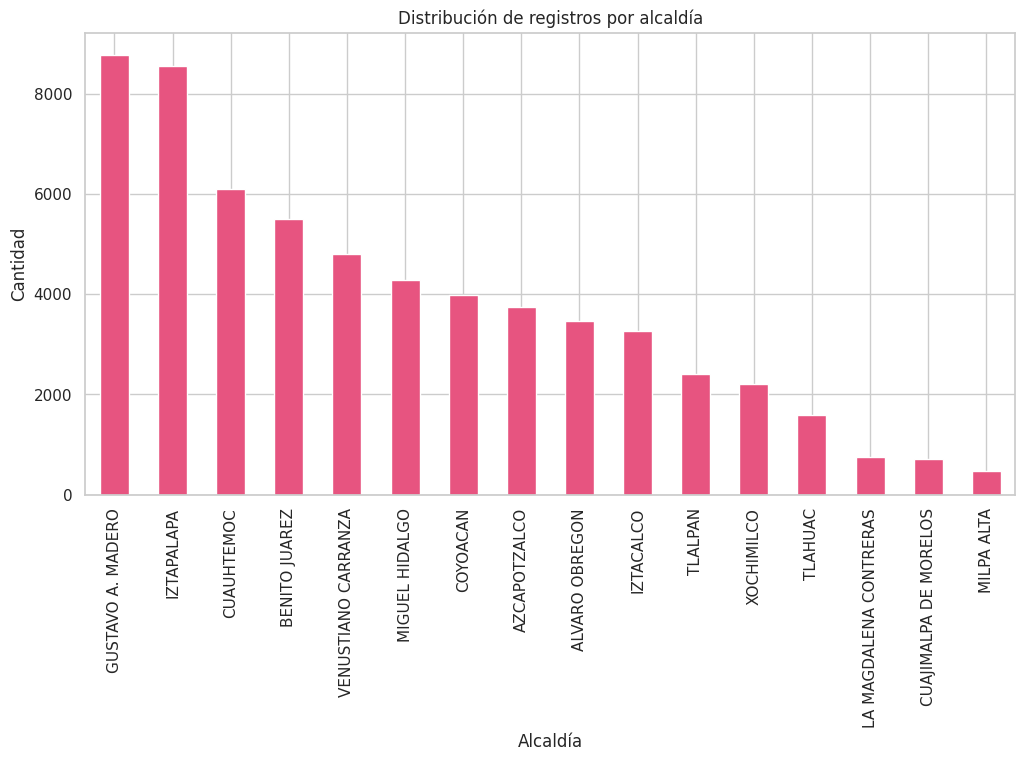

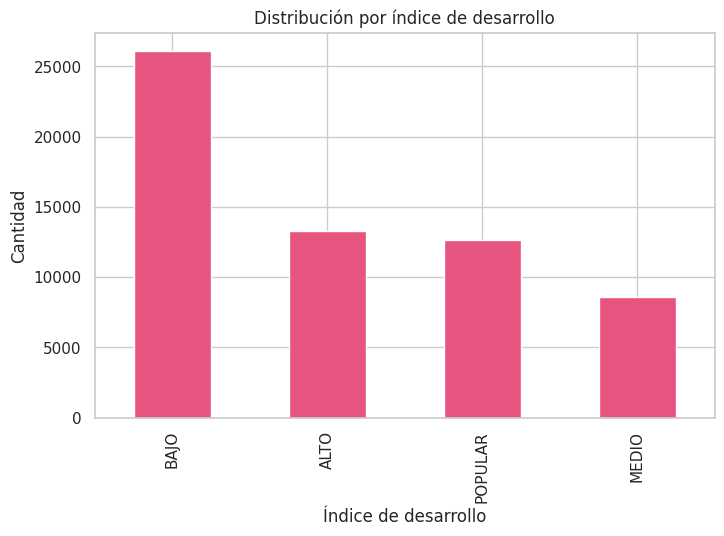

In [24]:
# Distribución por alcaldía
if 'alcaldia' in df_limpio.columns:
    plt.figure(figsize=(12,6))
    df_limpio['alcaldia'].value_counts().plot(kind='bar', color="#e75480")
    plt.title('Distribución de registros por alcaldía')
    plt.ylabel('Cantidad')
    plt.xlabel('Alcaldía')
    plt.show()

# Distribución por índice de desarrollo
if 'indice_des' in df_limpio.columns:
    plt.figure(figsize=(8,5))
    df_limpio['indice_des'].value_counts().plot(kind='bar', color="#e75480")
    plt.title('Distribución por índice de desarrollo')
    plt.ylabel('Cantidad')
    plt.xlabel('Índice de desarrollo')
    plt.show()

**Boxplots de consumo promedio por alcaldía e índice de desarrollo**

Estos gráficos permiten comparar la dispersión y tendencia del consumo promedio entre diferentes alcaldías y niveles de desarrollo.

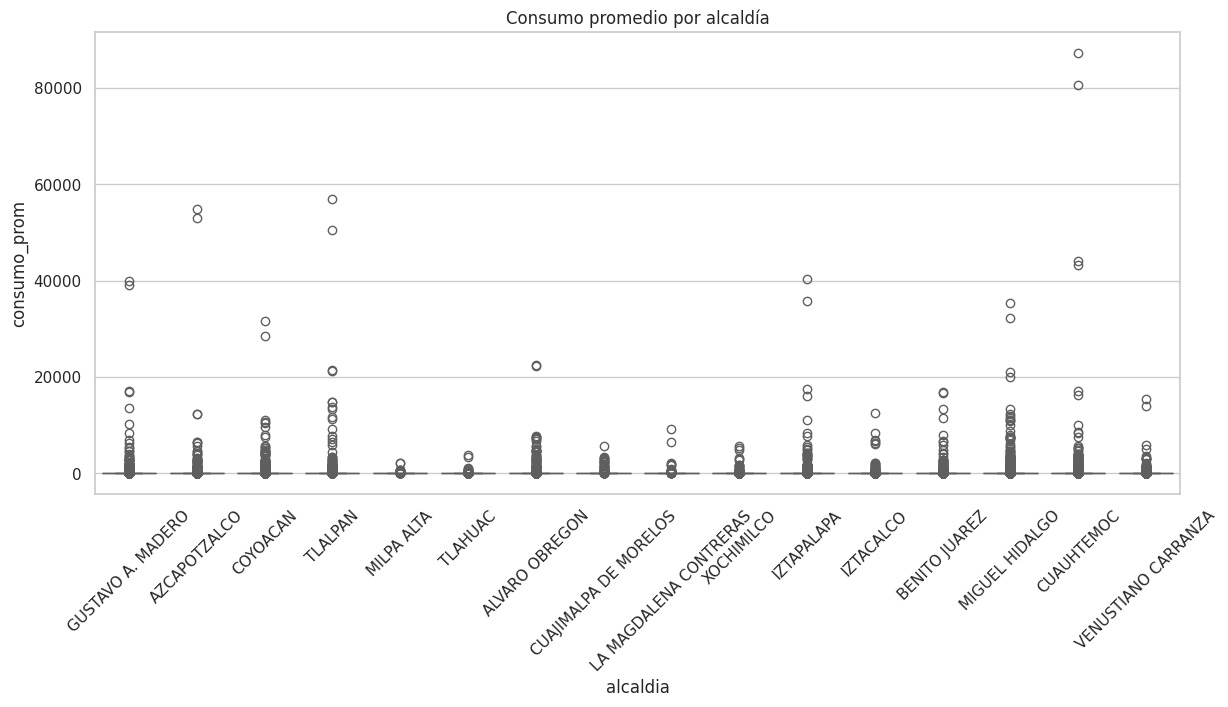

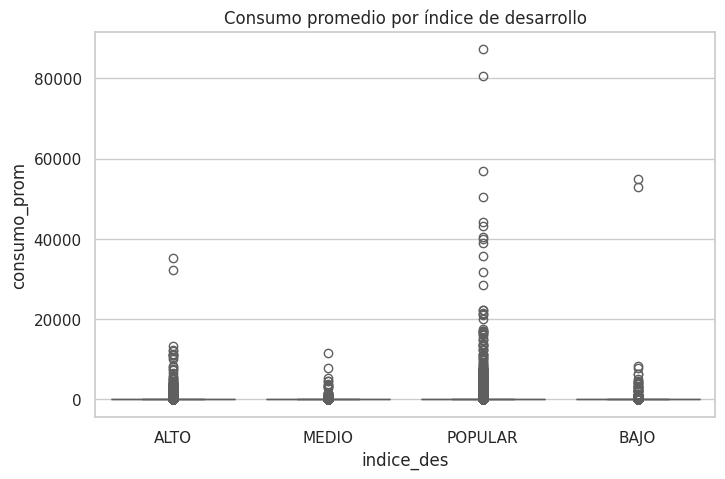

In [25]:
# Boxplot de consumo promedio por alcaldía
if 'alcaldia' in df_limpio.columns:
    plt.figure(figsize=(14,6))
    sns.boxplot(x='alcaldia', y='consumo_prom', data=df_limpio, color="#e75480")
    plt.xticks(rotation=45)
    plt.title('Consumo promedio por alcaldía')
    plt.show()

# Boxplot de consumo promedio por índice de desarrollo
if 'indice_des' in df_limpio.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='indice_des', y='consumo_prom', data=df_limpio, color="#e75480")
    plt.title('Consumo promedio por índice de desarrollo')
    plt.show()

**3.2 Correlación entre variables numéricas**  
En esta sección se calcula y visualiza la matriz de correlación de Pearson entre las variables numéricas del conjunto de datos. Este análisis permite identificar relaciones lineales entre variables, lo cual es útil tanto para la comprensión del fenómeno como para la selección de variables en modelos posteriores. Las correlaciones altas entre pares pueden indicar redundancia o dependencia, mientras que las bajas pueden señalar variables independientes.

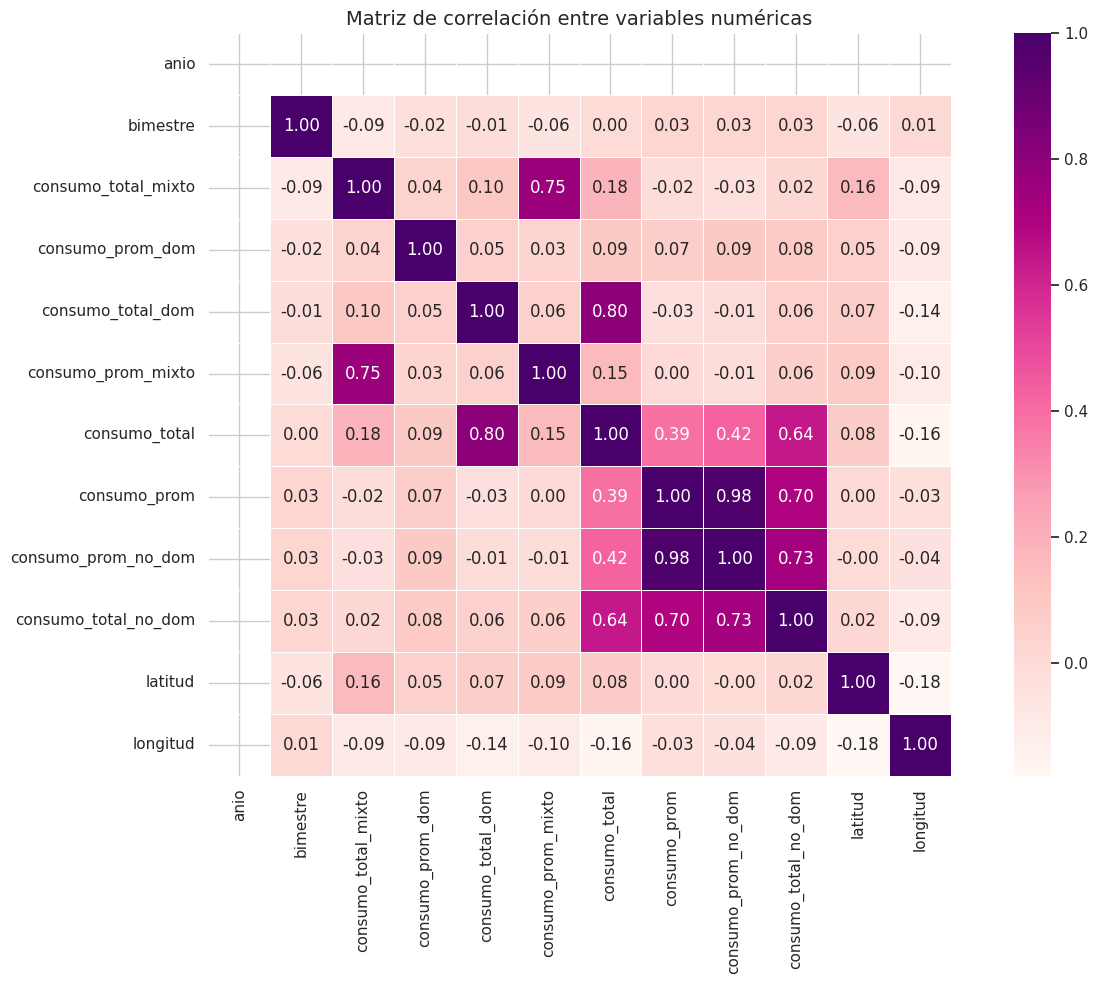

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seleccionar solo las columnas numéricas
df_numericas = df_limpio.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación
matriz_corr = df_numericas.corr()

# Visualizar la matriz con un mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(matriz_corr, annot=True, fmt=".2f", cmap="RdPu", square=True, linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas', fontsize=14)
plt.tight_layout()
plt.show()


Esta matriz de correlación muestra relaciones lineales fuertes entre algunas variables:

Existe una correlación casi perfecta entre consumo_total y consumo_prom, con un coeficiente de 0.98, lo cual es esperable ya que ambas variables están íntimamente relacionadas.

También se observan correlaciones altas entre los consumos total y promedio dentro de cada tipo de uso:

consumo_total_dom y consumo_total (0.80)

consumo_prom_no_dom y consumo_prom (0.70)

consumo_total_mixto y consumo_prom_mixto (0.75)

La relación entre consumo_total_no_dom y consumo_total también es relevante (0.64), lo que indica que el componente no doméstico tiene peso significativo en el total.

Esto sugiere posible redundancia en variables fuertemente correlacionadas, por lo que se recomienda precaución al incluirlas juntas en futuros modelos para evitar multicolinealidad.

Variables como latitud, longitud, año y bimestre no muestran correlaciones destacables con las variables de consumo, lo cual es esperable dado su carácter geográfico o temporal. Sin embargo, podrían cobrar relevancia en análisis espaciales o series de tiempo más adelante.

**3.3 Detección de valores atípicos**  
El objetivo de esta sección es identificar observaciones extremas (outliers) en las variables numéricas de consumo. Los valores atípicos pueden distorsionar las estadísticas descriptivas, afectar modelos predictivos y reflejar errores de captura o fenómenos excepcionales que requieren análisis adicional.

Utilizaremos gráficos de tipo boxplot para visualizar los valores extremos por variable. Este tipo de gráfico permite observar la mediana, los cuartiles y los posibles outliers (valores fuera de los bigotes) para cada métrica de consumo.

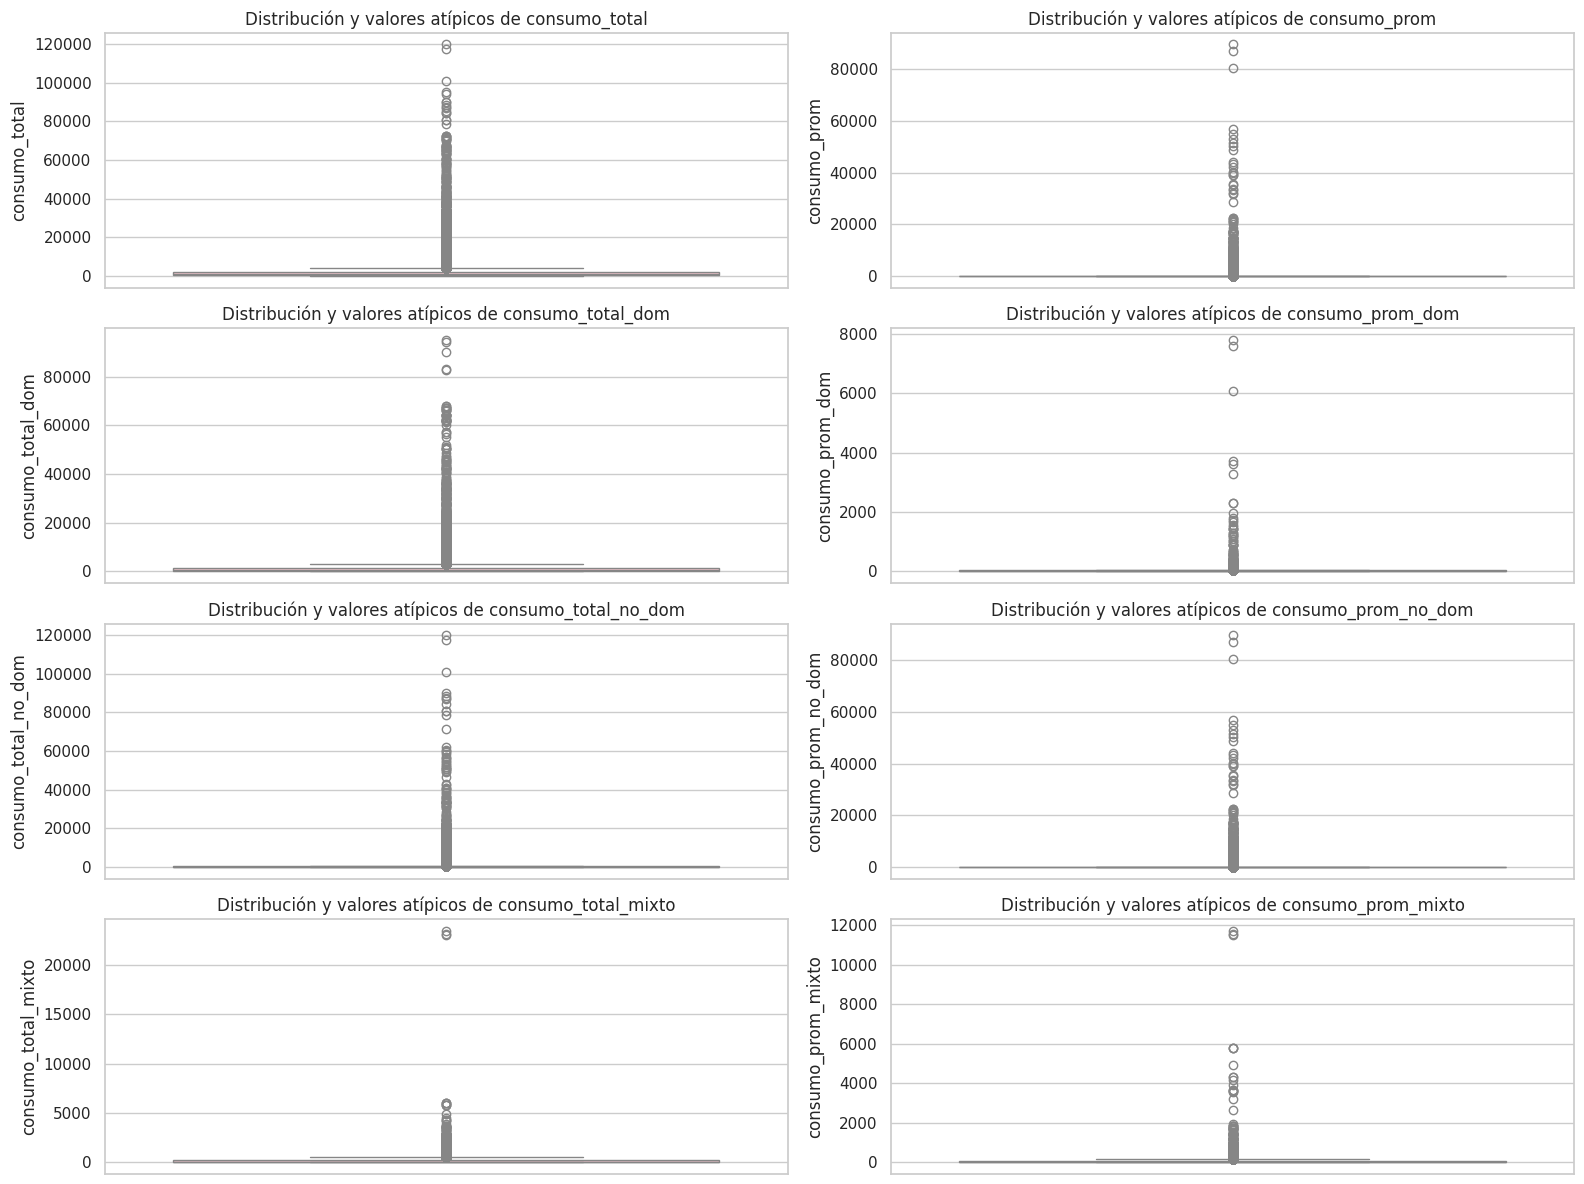

In [14]:


# Estilo de visualización
sns.set(style="whitegrid")

# Selección de variables numéricas de consumo
variables_consumo = [
    'consumo_total', 'consumo_prom', 'consumo_total_dom', 'consumo_prom_dom',
    'consumo_total_no_dom', 'consumo_prom_no_dom',
    'consumo_total_mixto', 'consumo_prom_mixto'
]

# Definir tamaño de figura
plt.figure(figsize=(16, 12))

# Crear subplots para cada variable
for i, var in enumerate(variables_consumo, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df, y=var, color='pink')
    plt.title(f'Distribución y valores atípicos de {var}')

plt.tight_layout()
plt.show()

**3.4 Transformaciones y normalización**  
Tras aplicar transformaciones logarítmicas para reducir la asimetría de las distribuciones, procedemos a normalizar las variables numéricas. Este paso es esencial para muchos algoritmos de modelado, en particular aquellos basados en distancias (como k-NN, SVM, clustering o PCA), ya que garantiza que todas las variables contribuyan de manera comparable.

Se aplicarán dos métodos de escalamiento:

- **Z-score (StandardScaler)**: centra las variables en media cero y desviación estándar uno.
- **Min-Max Scaling**: transforma las variables para que queden en el rango [0, 1].


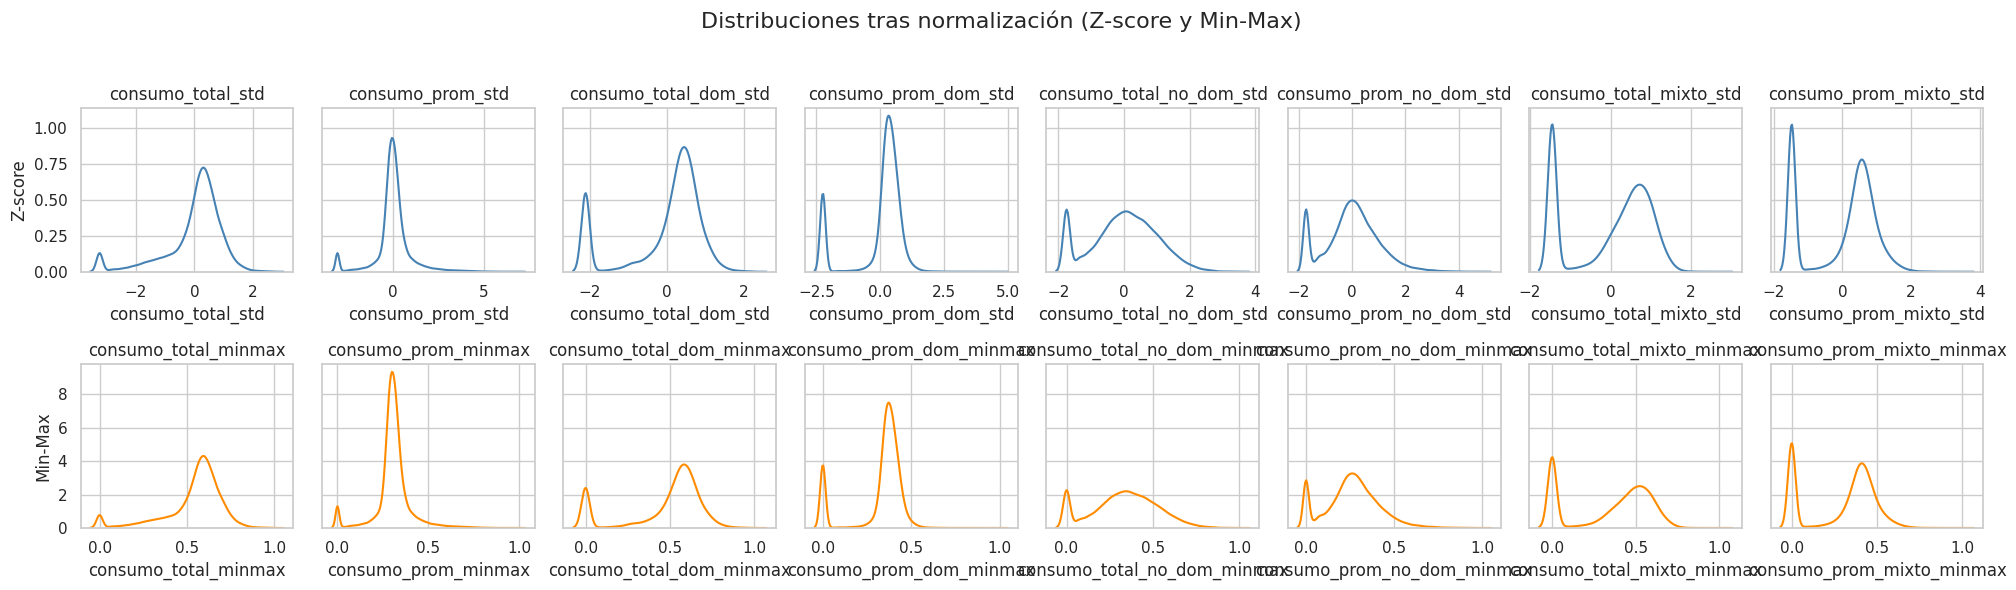

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# Seleccionamos variables numéricas transformadas previamente con log(1+x)
variables_log = [
    'consumo_total', 'consumo_prom', 'consumo_total_dom', 'consumo_prom_dom',
    'consumo_total_no_dom', 'consumo_prom_no_dom',
    'consumo_total_mixto', 'consumo_prom_mixto'
]

# Creamos una copia del DataFrame para aplicar log(1 + x)
df_log = df.copy()
df_log[variables_log] = df_log[variables_log].apply(lambda x: np.log1p(x))

# Normalización con StandardScaler
scaler_std = StandardScaler()
df_std = pd.DataFrame(
    scaler_std.fit_transform(df_log[variables_log]),
    columns=[f"{col}_std" for col in variables_log]
)

# Normalización con MinMaxScaler
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(
    scaler_minmax.fit_transform(df_log[variables_log]),
    columns=[f"{col}_minmax" for col in variables_log]
)

# Gráficas de distribución
fig, axes = plt.subplots(nrows=2, ncols=8, figsize=(20, 6), sharey='row')
fig.suptitle('Distribuciones tras normalización (Z-score y Min-Max)', fontsize=16)

# Z-score
for i, col in enumerate(df_std.columns):
    sns.kdeplot(df_std[col], ax=axes[0, i], color='steelblue')
    axes[0, i].set_title(f"{col}")

# Min-Max
for i, col in enumerate(df_minmax.columns):
    sns.kdeplot(df_minmax[col], ax=axes[1, i], color='darkorange')
    axes[1, i].set_title(f"{col}")

axes[0, 0].set_ylabel('Z-score')
axes[1, 0].set_ylabel('Min-Max')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


**3.5 Detección y tratamiento de valores atípicos**  

En esta etapa, el objetivo es identificar observaciones que presentan un comportamiento extremo respecto al resto de los datos y que podrían distorsionar los análisis posteriores.  
A continuación se identifican y visualizan los valores atípicos usando el rango intercuartílico (IQR) y diagramas de caja (boxplots) para las variables transformadas con `log(1 + x)`.

consumo_total: 6394 outliers detectados
consumo_prom: 9921 outliers detectados
consumo_total_dom: 10388 outliers detectados
consumo_prom_dom: 11189 outliers detectados
consumo_total_no_dom: 109 outliers detectados
consumo_prom_no_dom: 1127 outliers detectados
consumo_total_mixto: 0 outliers detectados
consumo_prom_mixto: 0 outliers detectados


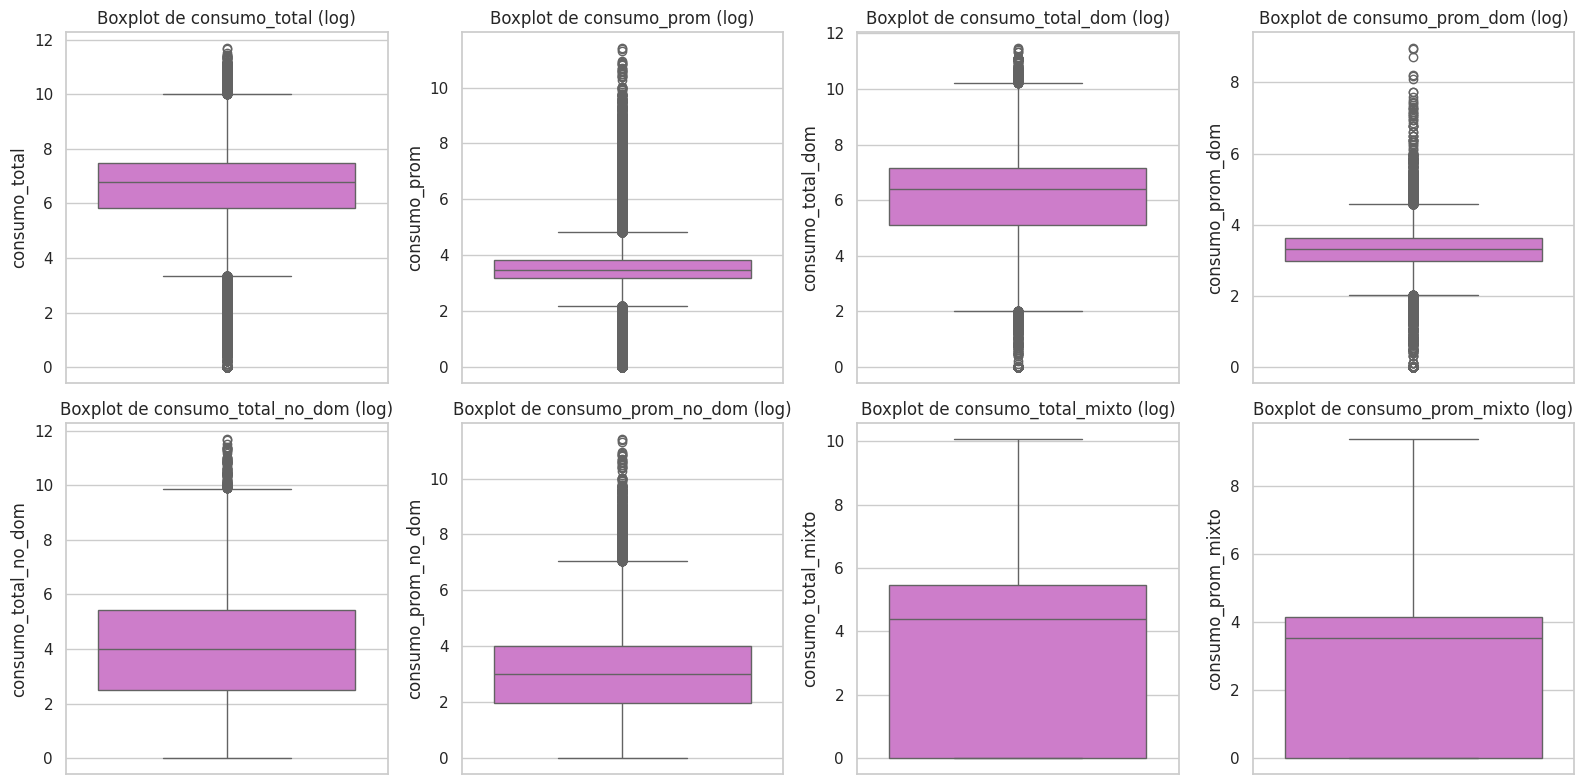

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Usamos el DataFrame log-transformado
variables_log = [
    'consumo_total', 'consumo_prom', 'consumo_total_dom', 'consumo_prom_dom',
    'consumo_total_no_dom', 'consumo_prom_no_dom',
    'consumo_total_mixto', 'consumo_prom_mixto'
]

# Calculamos los límites IQR y marcamos outliers para cada variable
outliers_dict = {}
for var in variables_log:
    Q1 = df_log[var].quantile(0.25)
    Q3 = df_log[var].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = ((df_log[var] < lower) | (df_log[var] > upper)).sum()
    outliers_dict[var] = outliers
    print(f"{var}: {outliers} outliers detectados")

# Visualización de boxplots para las variables log-transformadas
plt.figure(figsize=(16, 8))
for i, var in enumerate(variables_log, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df_log[var], color='orchid')
    plt.title(f'Boxplot de {var} (log)')
plt.tight_layout()
plt.show()